# **Exploratory Data Analysis (EDA) with cleaned Ames Housing dataset**

## Objectives

* Read cleaned_data.csv and confirm the dataset shape, column structure, and absence of missing values.
* Use appropriate libraries for analysis and visualisation:
   - `pandas` → data manipulation  
   - `numpy` → numerical operations  
   - `matplotlib.pyplot` → plotting distributions and relationships  
   - `seaborn` → advanced visualisations (correlation heatmap, boxplots, scatterplots)
* Explore the distribution of important numerical and categorical features.
* Investigate how different house attributes relate to `SalePrice`.
* Visualise correlations to identify the strongest predictor variables.
* Compare the client's inherited houses to the overall Ames market.
* Use the insights gained to guide feature selection for the modelling notebook.


## Inputs

* `data/processed/cleaned_data.csv` - The fully cleaned main Ames Housing dataset produced in 02_data_ckeaning.ipynb.
* `data/raw/inherited_houses.csv` - The four inherited properties that must be analysed and later predicted.
* The following Python libraries:`pandas`,`numpy`,`matplotlib.pyplot`,`seaborn`


## Outputs

* Distribution plots (histograms, KDEs, and boxplots) for key numerical features.
* Countplots/bar charts for categorical variables.
* Scatterplots showing relationships between numerical predictors and SalePrice.
* Boxplots showing how categorical variables influence sale price.
* A correlation matrix and correlation heatmap for numerical features.
* Visual comparisons between inherited houses and the wider Ames dataset.
* A summary of analysis findings to support feature selection for modelling.



## Additional Comments

* This notebook does not perform further data cleaning; all cleaning operations were completed in `02_data_cleaning.ipynb`.
- Plots generated in this notebook will also be saved later for use in the Streamlit dashboard.
- All plots and insights should contribute to answering the client’s business questions:
  1. Which features affect house price the most?  
  2. How do the client’s inherited houses compare to the market?
- Insights from this analysis will directly influence the feature engineering and model training steps in the next notebook.


---

# Inspect the cleaned dataset

### Step 1: Load the cleaned dataset

In this step, I load the cleaned_data.csv dataset that was produced in the `02_data_cleaning.ipynb` notebook. The cleaned dataset contains all of the earlier data preparation steps. The cleaned dataset will be used as the basis for all exploratory visualisations in this notebook.

The client's inherited houses dataset will be loaded later, only when needed for direct comparison during the EDA. This helps keep the notebook focused and avoids introducing unused variables at the start.


In [1]:
import pandas as pd
import numpy as np

# Display options
pd.set_option("display.max_columns", None)

# Path to cleaned dataset
cleaned_path = "data/processed/cleaned_data.csv"

# Load cleaned housing data
housing_df = pd.read_csv(cleaned_path)

# Preview
housing_df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,GrLivArea,KitchenQual,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,548,RFn,2003.0,1710,Gd,8450,65.0,196.0,61,5,7,856,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,460,RFn,1976.0,1262,TA,9600,80.0,0.0,0,8,6,1262,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,608,RFn,2001.0,1786,Gd,11250,68.0,162.0,42,5,7,920,2001,2002,223500
3,961,0.0,3.0,No,216,ALQ,540,642,Unf,1998.0,1717,Gd,9550,60.0,0.0,35,5,7,756,1915,1970,140000
4,1145,0.0,4.0,Av,655,GLQ,490,836,RFn,2000.0,2198,Gd,14260,84.0,350.0,84,5,8,1145,2000,2000,250000


In [2]:
print("Shape of cleaned dataset:", housing_df.shape)
print("Total missing values:", housing_df.isna().sum().sum())

Shape of cleaned dataset: (1460, 22)
Total missing values: 0


The preview of the cleaned dataset confirms that the file imported correctly.  
Several checks validate that the cleaning steps applied in the previous notebook were successful:

- All columns display clean and consistent values, with no missing values present.
- Median imputation is visible in numeric columns such as `BedroomAbvGr`, `MasVnrArea`, and `LotFrontage`, which now contain numerical values with no gaps.
- Categorical imputation is correctly applied. e.g. rows with no basement or garage contain the meaningful labels.
- Year-based columns contain realistic values.
- All column data types appear correct, with numerical features stored as integers or floats, and categorical features stored as object types.

This confirms that the cleaned dataset is ready for detailed EDA in the next steps.

### Step 2: Review dataset structure for EDA

Before creating visualisations, it is important to understand the structure of the cleaned dataset.  
Unlike the initial inspection carried out in `01_data_exploration.ipynb`, this step focuses on confirming that the cleaned dataset:

- contains the expected columns,
- uses the correct data types (after cleaning),
- contains no missing values,
- data is ready for analysis

I will use:
- `df.info()` to view column names, data types, and non-null counts,
- `df.describe().T` to summarise numerical features,
- `df.columns.tolist()` to display all feature names clearly in one list.

In [6]:
# Check dataframe structure

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1stFlrSF      1460 non-null   int64  
 1   2ndFlrSF      1460 non-null   float64
 2   BedroomAbvGr  1460 non-null   float64
 3   BsmtExposure  1460 non-null   object 
 4   BsmtFinSF1    1460 non-null   int64  
 5   BsmtFinType1  1460 non-null   object 
 6   BsmtUnfSF     1460 non-null   int64  
 7   GarageArea    1460 non-null   int64  
 8   GarageFinish  1460 non-null   object 
 9   GarageYrBlt   1460 non-null   float64
 10  GrLivArea     1460 non-null   int64  
 11  KitchenQual   1460 non-null   object 
 12  LotArea       1460 non-null   int64  
 13  LotFrontage   1460 non-null   float64
 14  MasVnrArea    1460 non-null   float64
 15  OpenPorchSF   1460 non-null   int64  
 16  OverallCond   1460 non-null   int64  
 17  OverallQual   1460 non-null   int64  
 18  TotalBsmtSF   1460 non-null 

In [7]:
# Summary statistics for numerical features

housing_df.describe().T

,count,mean,std,min,25%,50%,75%,max
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.0,1391.25,4692.0
2ndFlrSF,1460.0,327.994521,433.576171,0.0,0.00,0.0,714.50,2065.0
BedroomAbvGr,1460.0,2.878082,0.792485,0.0,2.00,3.0,3.00,8.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0
GarageArea,1460.0,472.980137,213.804841,0.0,334.50,480.0,576.00,1418.0
GarageYrBlt,1460.0,1978.589041,23.997022,1900.0,1962.00,1980.0,2001.00,2010.0
GrLivArea,1460.0,1515.463699,525.480383,334.0,1129.50,1464.0,1776.75,5642.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
LotFrontage,1460.0,69.863699,22.027677,21.0,60.00,69.0,79.00,313.0


In [8]:
# List all column names for reference

housing_df.columns.tolist()

['1stFlrSF',
 '2ndFlrSF',
 'BedroomAbvGr',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinType1',
 'BsmtUnfSF',
 'GarageArea',
 'GarageFinish',
 'GarageYrBlt',
 'GrLivArea',
 'KitchenQual',
 'LotArea',
 'LotFrontage',
 'MasVnrArea',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd',
 'SalePrice']

The above three outputs confirm that the cleaned dataset was imported successfully and is ready for EDA.

**Key observations:**

- **No missing values:** All 22 columns contain 1460 non-null entries, which is the correct size of the Ames dataset.
- **Correct data types:**  
  - 13 columns are stored as `int64`,  
  - 5 columns as `float64` (these include the imputed numeric features),  
  - 4 columns as `object` (the expected categorical features).  
  This shows that numerical and categorical variables are correctly represented.
- **Realistic summary statistics:**  
  The numerical summaries from `df.describe().T` show appropriate ranges and distribution patterns for housing data. For example:  
  - `GrLivArea` ranges from 334 to 5642 sq ft,  
  - `LotArea` ranges from 1,300 to 215,245 sq ft,  
  - `SalePrice` ranges from 34,900 to 755,000.  
  These values are realistic for the Ames housing market.
- **Categorical columns are clean:**  
  All object-type features seen in the dataset match the categories validated in the cleaning notebook.
- **Column list verified:**  
  The dataset contains the expected 22 cleaned features with no duplicated or unnecessary columns.

---

# Explore the distribution of features 

### Step 3: Explore Numerical Feature Distributions

In this section, I explore the distribution of key numerical features in cleaned_data.csv.  

Understanding these distributions helps identify:

- skewness (important for deciding transformations),
- natural ranges of the variables,
- the presence of outliers,
- variable behaviour relevant for modelling.

For these numeric features, I will plot histograms with KDE (Kernel Density Estimation) to visualise the overall shape, and use boxplots to highlight outliers and spread.

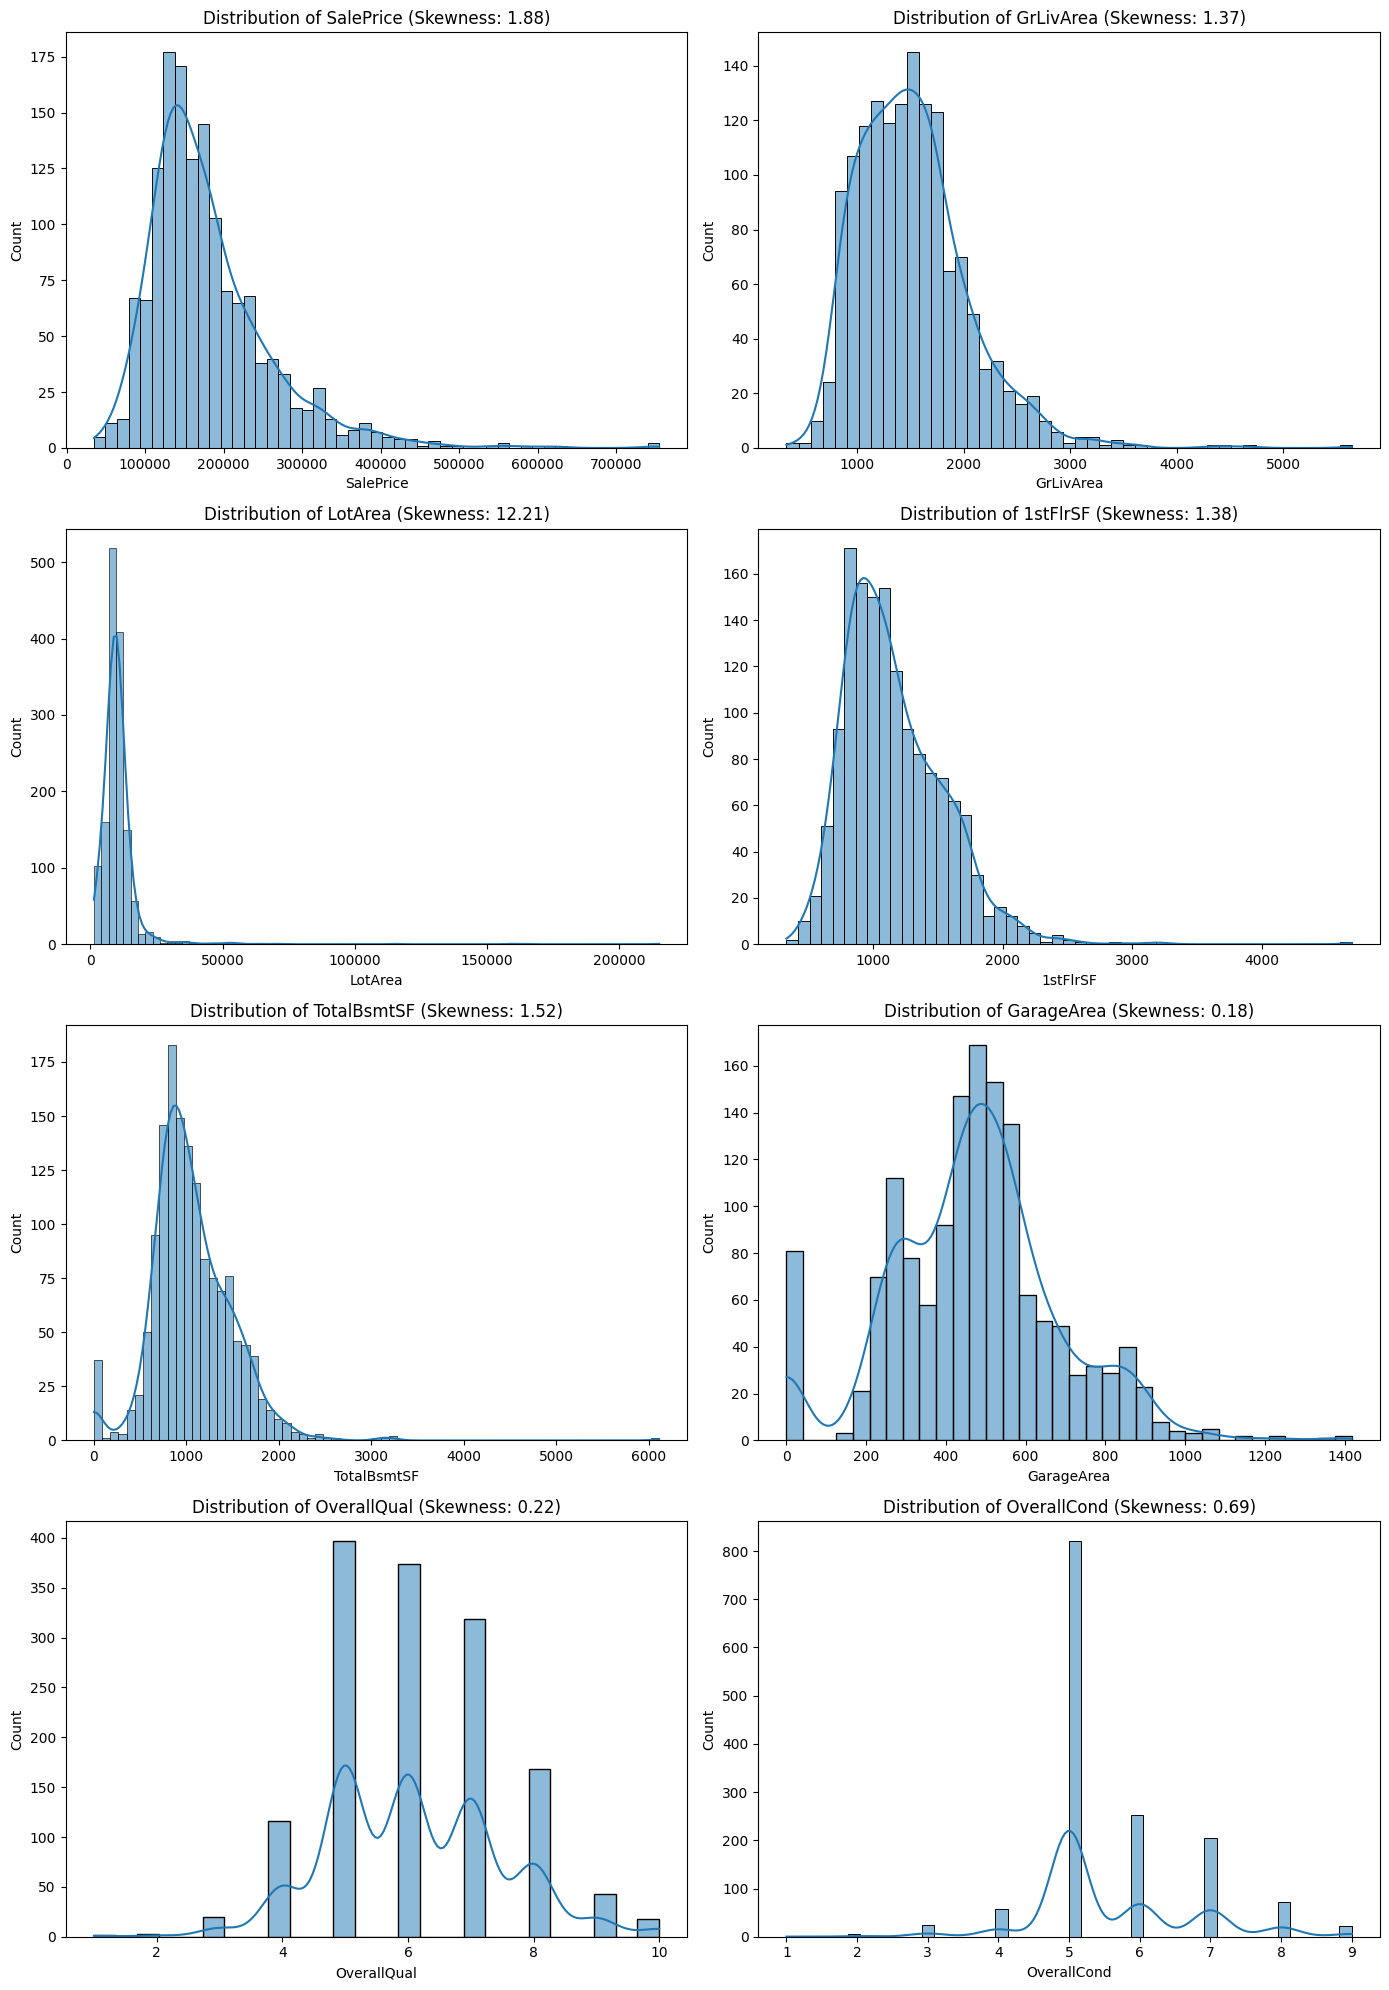

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3.2: 

# List of key numerical features to inspect
numerical_cols = [
    "SalePrice", "GrLivArea", "LotArea", "1stFlrSF",
    "TotalBsmtSF", "GarageArea", "OverallQual", "OverallCond"
]

plt.figure(figsize=(14, 20))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 2, i)
    
    # Plot histogram + KDE curve for the current feature
    sns.histplot(housing_df[col], kde=True)
    
    # Add the skewness value in the title for quick reference
    skew_val = housing_df[col].skew()
    plt.title(f"Distribution of {col} (Skewness: {skew_val:.2f})")

    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


#### 3.2: Interpretation of numerical feature distributions

The histograms with KDE lines show that several key numerical variables are positively (right) skewed:

- `SalePrice`, `GrLivArea`, `1stFlrSF`, `TotalBsmtSF`, and especially `LotArea` (skewness ≈ 12.21) all have long right tails. This reflects the presence of a small number of very large or very expensive properties in the Ames housing market.
- `GarageArea` is almost symmetric (skewness ≈ 0.18), indicating a roughly normal distribution of garage sizes.
- `OverallQual` and `OverallCond` are discrete rating scales and display only mild skewness.

The strong right skew in `SalePrice`, `GrLivArea`, and `LotArea` is typical for real estate data but has implications for modelling. In later notebooks I may apply transformations to reduce skewness, stabilise variance, and improve the performance of regression models.

The plots also confirm the presence of outliers in several features. These outliers represent legitimate properties (e.g. very large houses or plots) and were deliberately retained during data cleaning, but they are important to keep in mind when interpreting model results.


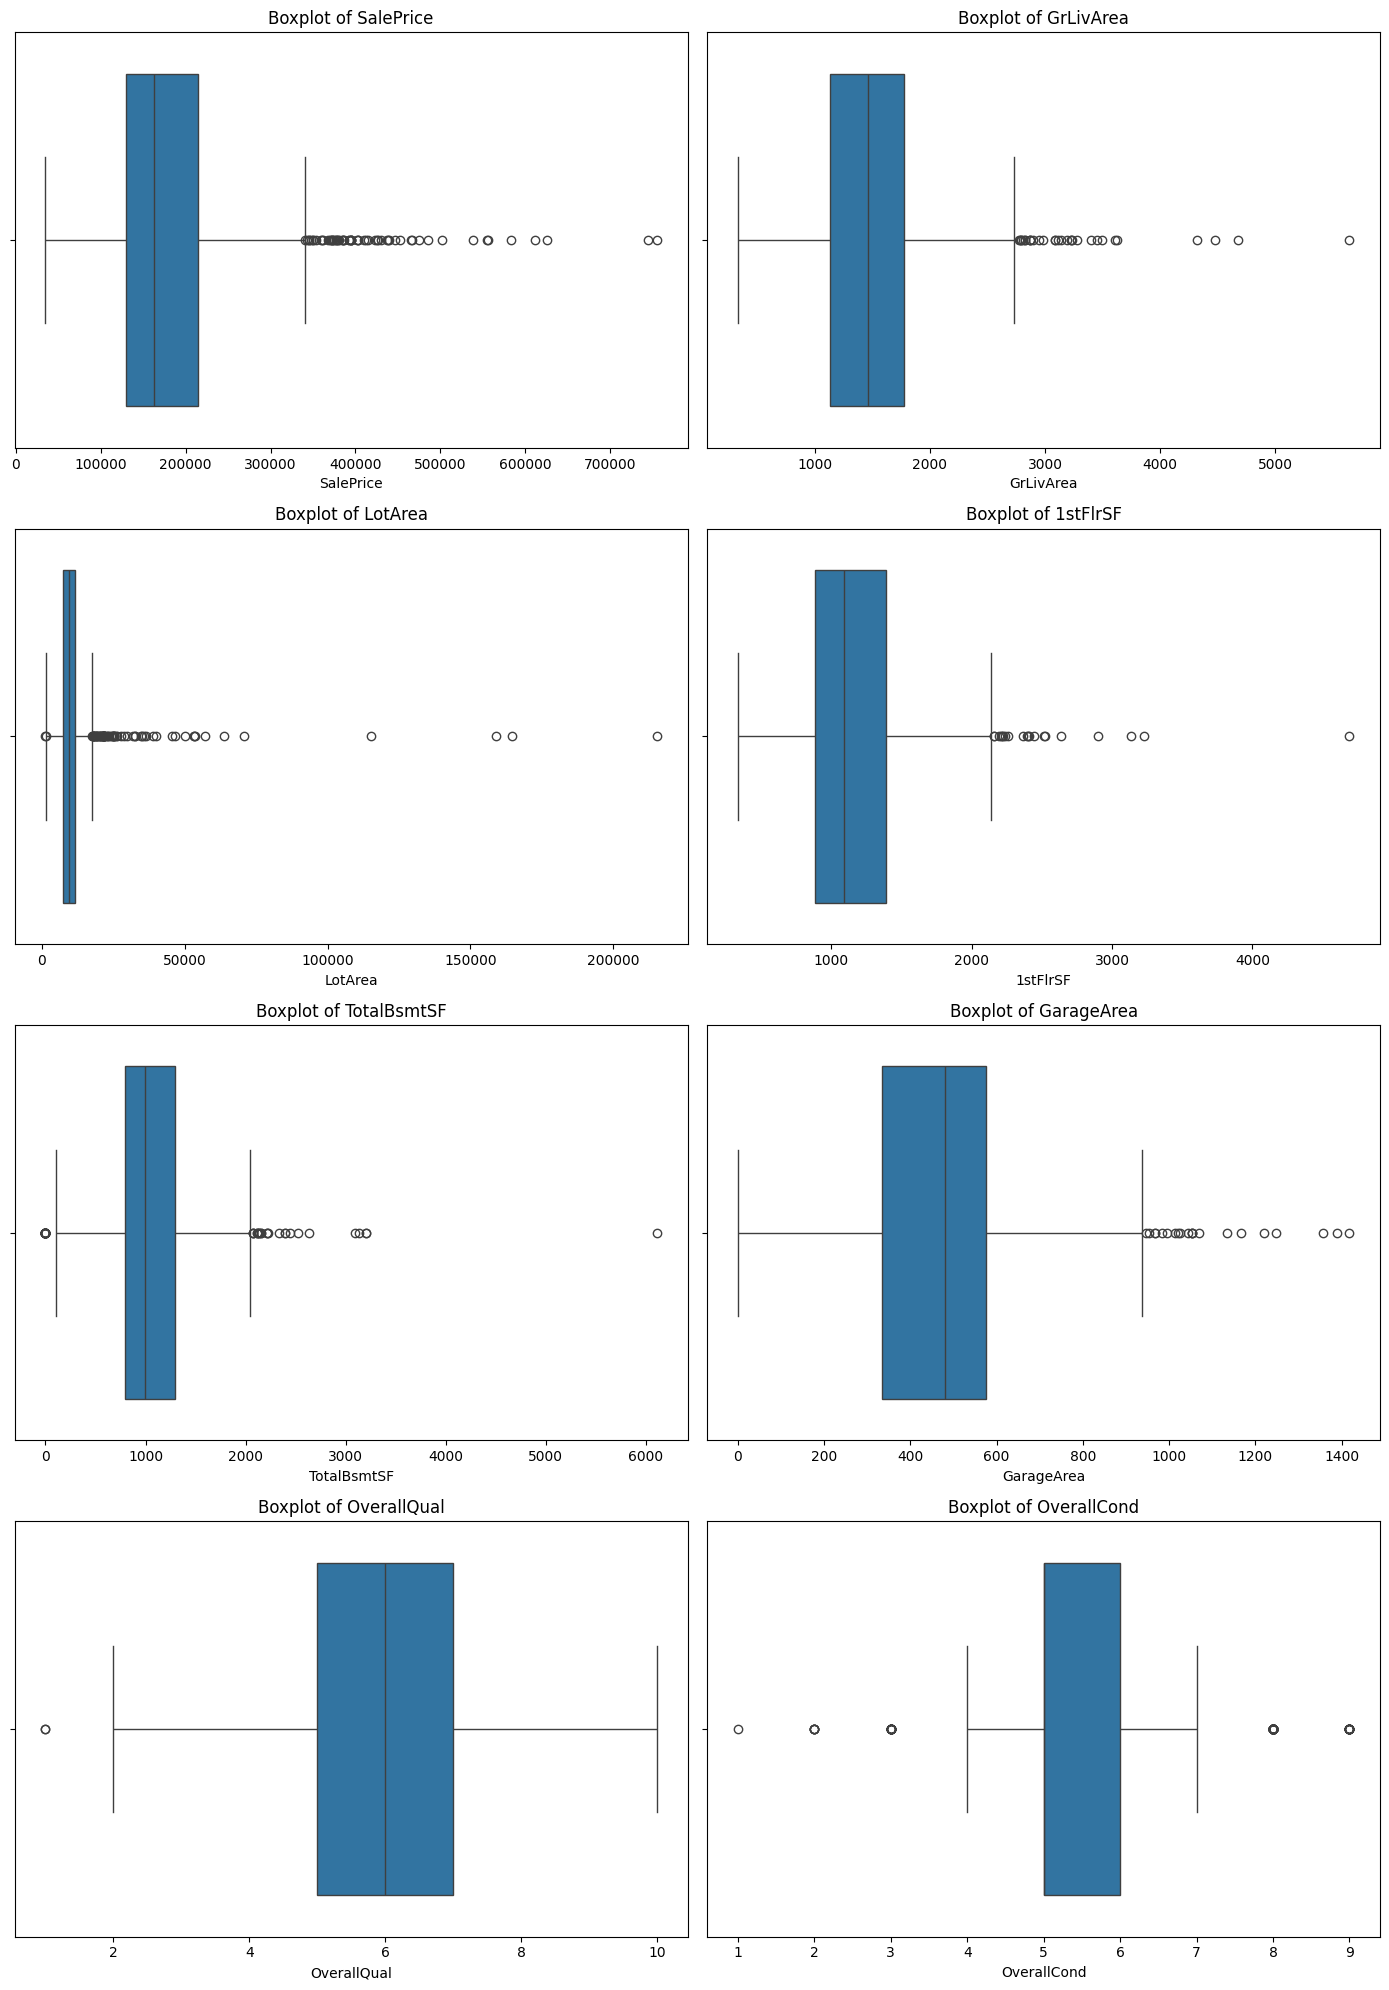

In [14]:
# Step 3.3:

# The same numerical features used in the histogram/KDE plots
numerical_cols = [
    "SalePrice", "GrLivArea", "LotArea", "1stFlrSF",
    "TotalBsmtSF", "GarageArea", "OverallQual", "OverallCond"
]

plt.figure(figsize=(14, 20))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=housing_df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)

# Adjust layout so titles/labels do not overlap
plt.tight_layout()
plt.show()


### 3.3: Boxplot Analysis of Numerical Features

The boxplots provide a visual summary of the spread, central tendency, and presence of outliers in each numerical feature. Outliers appear as individual points beyond the whiskers, while the length of the box (IQR) indicates the variability in the data.

#### Key observations:

- **SalePrice:**  
  This feature contains several high-value outliers, representing very expensive properties in Ames. The distribution is right-skewed, which is consistent with the earlier histogram.

- **GrLivArea:**  
  Several large outliers appear beyond 3000 sq ft, indicating a small number of very large homes. These properties genuinely exist in the dataset and were intentionally retained.

- **LotArea:**  
  This feature shows some of the most extreme outliers in the dataset. A small number of properties have very large land areas (up to 200,000+ sq ft), which creates a long right tail.

- **1stFlrSF and TotalBsmtSF:**  
  Both features exhibit right-skewed distributions with outliers corresponding to unusually large basements or first-floor areas.

- **GarageArea:**  
  This feature has fewer outliers compared to the other size-related features. The distribution is more symmetric, suggesting garages do not vary as drastically in size.

- **OverallQual:**  
  Unlike the continuous features above, this is an ordinal rating from 1–10. Most values fall between 5 and 8, and outliers simply represent rare low- or high-quality ratings.

- **OverallCond:**  
  Similar to OverallQual, this ordinal variable has limited spread, with ratings mostly between 5 and 7. Outliers on either end represent uncommon cases of very poor or exceptional condition.

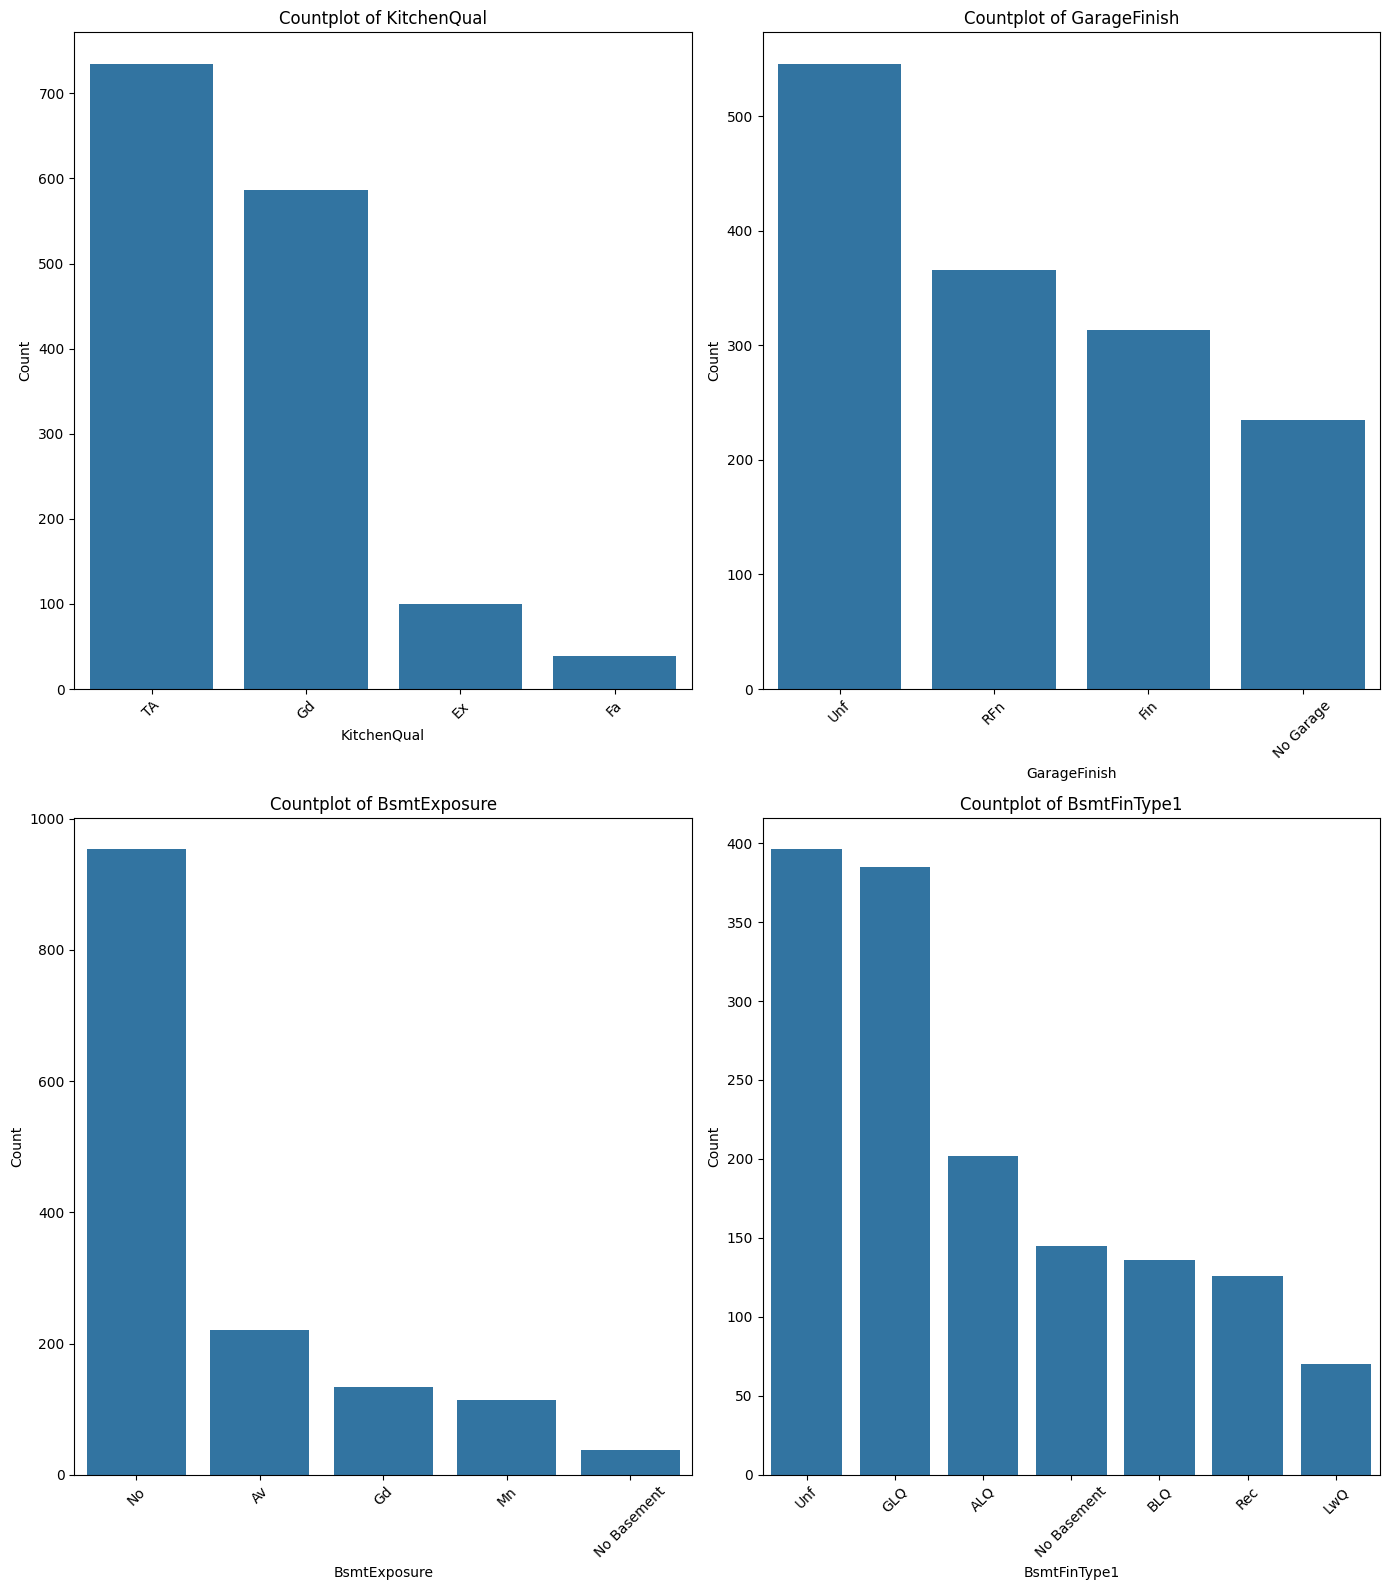

In [16]:
# Step 3.4:

# List of the categorical columns we want to analyse
categorical_cols = ["KitchenQual", "GarageFinish", "BsmtExposure", "BsmtFinType1"]
plt.figure(figsize=(14, 16))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=housing_df[col], order=housing_df[col].value_counts().index)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel("Count")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

---